**IMDb Movie Review Text Classification Tutorial**
===

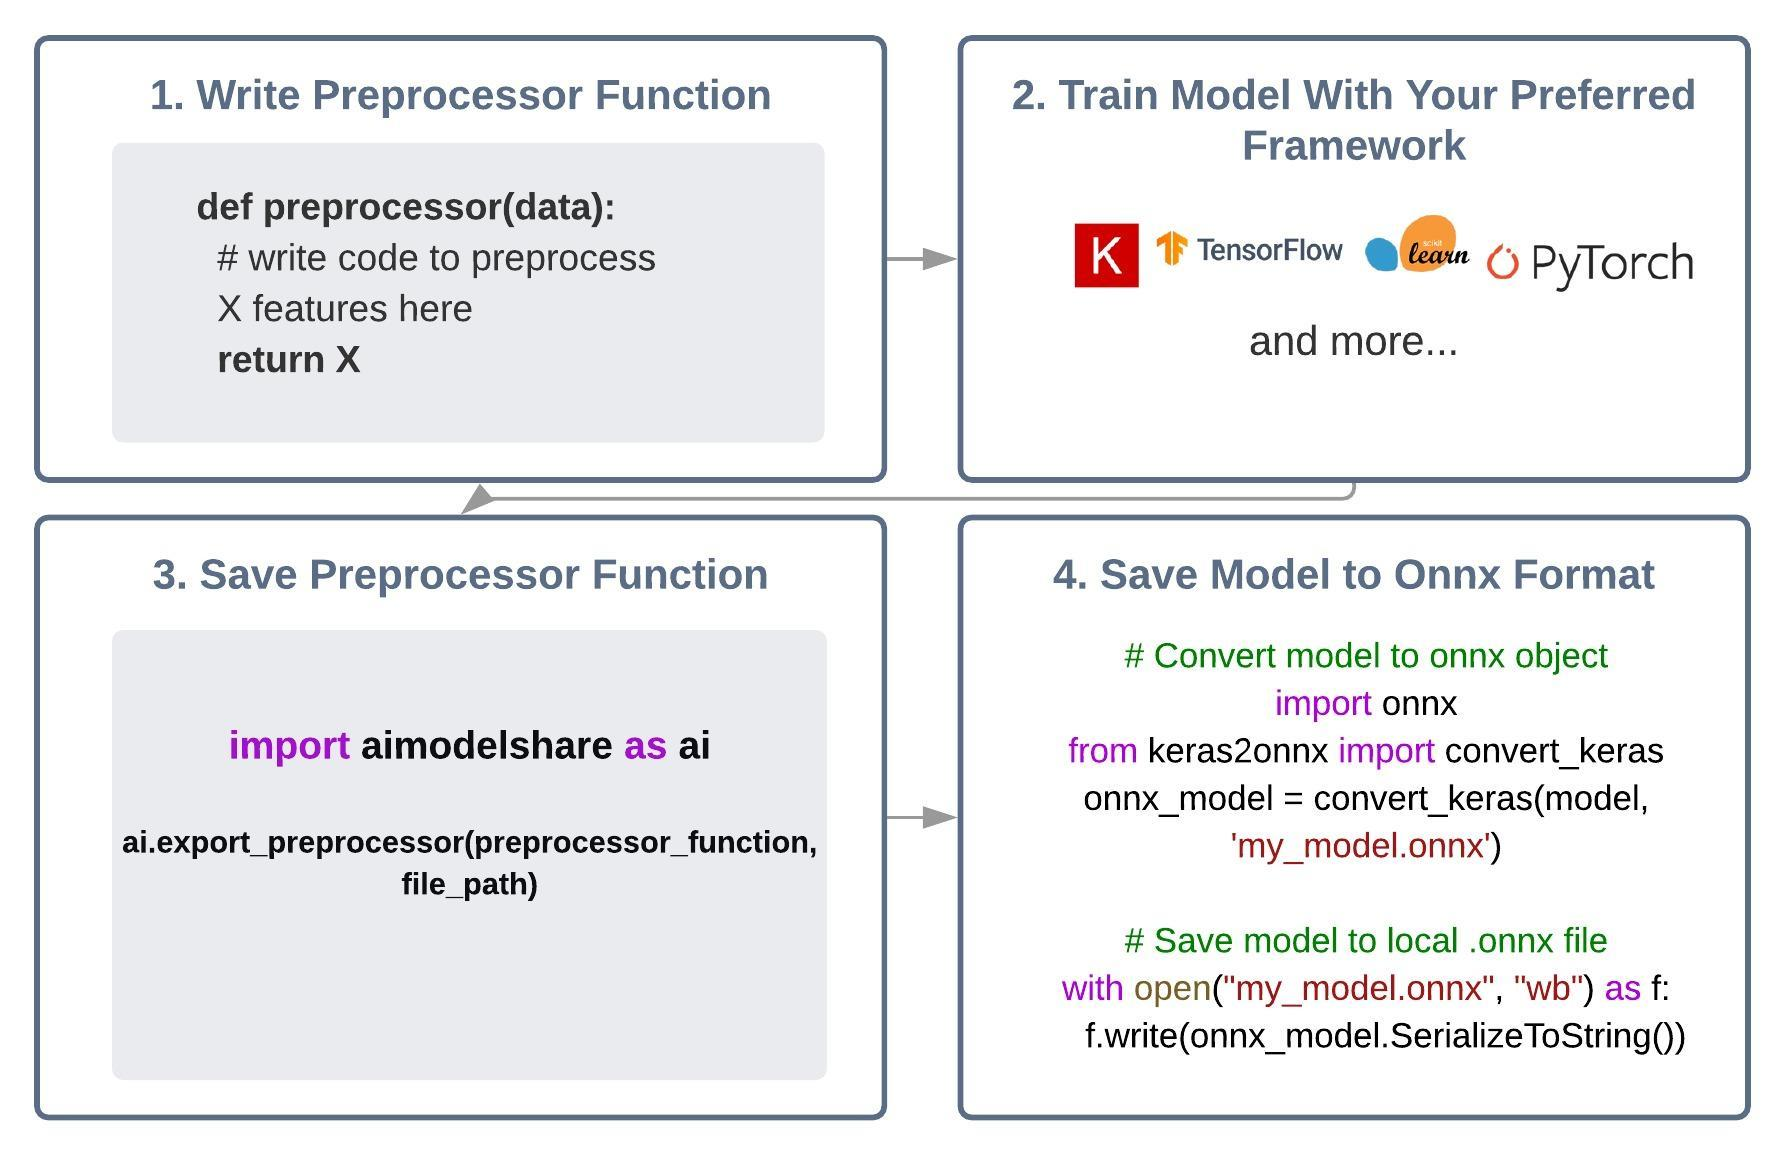

In [53]:
# Signposing: Build a model in four simple steps...
from IPython.display import Image
Image(filename='/content/AI Modelshare Model and Preprocessor Object Preparation.jpeg', width=750)

## **(1) Preprocessor Function & Setup**

### **Obtaining the IMDb Movie Review Dataset**

In [1]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2020-09-04 17:11:23--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  16.2MB/s    in 10s     

2020-09-04 17:11:34 (8.03 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [2]:
!tar -zxf aclImdb_v1.tar.gz

### **Load Files Manually**

In [3]:
! pip install pyprind

In [5]:
import pyprind
## conda install -c conda-forge pyprind ##

import pandas as pd
import os

# Change the `basepath` to the directory of the
# unzipped movie dataset.

basepath = 'aclImdb'

labels = {'pos': 1, 'neg': 0}
pbar = pyprind.ProgBar(50000)
df = pd.DataFrame()
for s in ('test', 'train'):
    for l in ('pos', 'neg'):
        path = os.path.join(basepath, s, l)
        for file in os.listdir(path):
            with open(os.path.join(path, file), 'r') as infile:
                txt = infile.read()
            df = df.append([[txt, labels[l]]], ignore_index=True)
            pbar.update()
df.columns = ['review', 'sentiment']

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:33


In [6]:
df

,review,sentiment
0,Jamie Foxx did an incredible job playing Ray C...,1
1,"""Crossfire"" is ostensibly a murder mystery but...",1
2,*May Contain Spoilers*<br /><br />The first ti...,1
3,"After a decade of turbulent unrest, American m...",1
4,"This is a nicely-done story with pretty music,...",1
...,...,...
49995,"Please humour me if you will, for a minute whi...",0
49996,*****THIS REVIEW MAY HAVE SPOILERS - but that ...,0
49997,The fact that I watched this entire movie says...,0
49998,"""Boom"" has garnered itself a something of a re...",0


In [7]:
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [8]:
print(df.head())

                                              review  sentiment
0  Jamie Foxx did an incredible job playing Ray C...          1
1  "Crossfire" is ostensibly a murder mystery but...          1
2  *May Contain Spoilers*<br /><br />The first ti...          1
3  After a decade of turbulent unrest, American m...          1
4  This is a nicely-done story with pretty music,...          1


### **Write a Preprocessor Function**

In [12]:
def preprocessor(data):
    preprocessed_data=t.texts_to_matrix(data, mode='count')
    return preprocessed_data

## **(2) Build a Model to Predict Positive/Negative Reviews**

In [9]:
# Define X, y data...
X = df['review']

y = df['sentiment']

print(X.shape)
print(y.shape)

(50000,)
(50000,)


In [10]:
# Set up training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(y_train.shape)

(37500,)
(37500,)


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Create the tokenizer...
t = Tokenizer(num_words=10000)

# Fit the tokenizer on the documents...
t.fit_on_texts(X_train)

In [13]:
preprocessor(X_train).shape

(37500, 10000)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import tensorflow.keras as keras
from keras.utils import to_categorical

model = Sequential()
model.add(Dense(64, input_dim=10000, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model...
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the ANN to the Training set...
model.fit(preprocessor(X_train), y_train)

1172/1172 [==============================] - 6s 5ms/step - loss: 0.3108 - accuracy: 0.8738


In [18]:
score = model.evaluate(preprocessor(X_test), y_test)
print('Accuracy: {:4f}'.format(score[1]))

391/391 [==============================] - 1s 2ms/step - loss: 0.2691 - accuracy: 0.8917
Accuracy: 0.891680


## **(3) Save Preprocessor**

In [ ]:
# ! pip3 install aimodelshare

In [20]:
def export_preprocessor(preprocessor_function, filepath):
    import dill
    with open(filepath, "wb") as f:
        dill.dump(preprocessor_function, f)

# import aimodelshare as ai # Once we can deploy this, we use it in lieu of the below.
# ai.export_preprocessor(preprocessor, "preprocessor.pkl")

export_preprocessor(preprocessor, "preprocessor.pkl")

## **(4) Save Model to Onnx File Format**

In [19]:
! pip3 install keras2onnx
! pip3 install onnxruntime

     |████████████████████████████████| 102kB 2.6MB/s 
     |████████████████████████████████| 81kB 4.6MB/s 
     |████████████████████████████████| 7.4MB 8.5MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111005 sha256=e9daa2d16775f3f304dca1dd200aba924fc22136caeb66fb656c0653f062bb27
  Stored in directory: /root/.cache/pip/wheels/c1/61/df/768b03527bf006b546dce284eb4249b185669e65afc5fbb2ac
Successfully built fire
     |████████████████████████████████| 4.4MB 2.8MB/s 


In [21]:
# Save model to onnx file...

import os
os.environ['TF_KERAS'] = '1' # Add this environmental variable whenever you use tensorflow's tf.keras to build your keras model.

import onnx
import keras2onnx

# Convert model to onnx object
import onnx
from keras2onnx import convert_keras
onnx_model = convert_keras(model, 'my_model.onnx')

# Save model to local .onnx file
with open("my_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

tf executing eager_mode: True
tf.keras model eager_mode: False
The ONNX operator number change on the optimization: 13 -> 9
The maximum opset needed by this model is only 9.
